<a href="https://colab.research.google.com/github/abdulhamidll/Data-Science/blob/main/portfolio_uchun_amaliyot_diabet_kasallagiga_tashxis_qoyish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [6]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"
df=pd.read_csv(url)
df.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
675,6,195,70,0,0,30.9,0.328,31,1
298,14,100,78,25,184,36.6,0.412,46,1
420,1,119,88,41,170,45.3,0.507,26,0
394,4,158,78,0,0,32.9,0.803,31,1
463,5,88,78,30,0,27.6,0.258,37,0
32,3,88,58,11,54,24.8,0.267,22,0
225,1,87,78,27,32,34.6,0.101,22,0
638,7,97,76,32,91,40.9,0.871,32,1
18,1,103,30,38,83,43.3,0.183,33,0
150,1,136,74,50,204,37.4,0.399,24,0


In [8]:
df.shape

(768, 9)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [12]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_predict = knn.predict(X_test)

In [16]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.4520547945205479

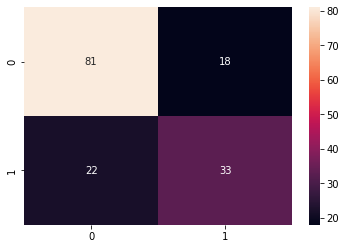

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()


In [18]:
confusion_matrix(y_test, y_predict)

array([[81, 18],
       [22, 33]])